In [5]:
import pandas as pd
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from datalayer import read_csv_sia, read_sia_model
import utils


pd.set_option('display.max_columns', 500)
%matplotlib inline

Existem duas funções dentro do datalayer importantes do SIA:
    - read_csv_sia
    - read_sia_model
    

### read_csv_sia

A função read_csv_sia faz uma limpeza superficial dos dados:

- Filtra colunas que tem o mesmo valores para todas as linhas.

- Chama a função get_relevant_columns que está dentro de utils.py que filtra as colunas que tem pelo 10% dos dados.

- Remove todas as colunas em que todos os valores são NaN.

- Transforma colunas object em datetime.

In [14]:
%time data = read_csv_sia('../data/Linfomas Radioterapia SIA-SUS.csv', method='radioterapia')

CPU times: user 532 ms, sys: 87.7 ms, total: 620 ms
Wall time: 629 ms


In [15]:
data.head()

,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,AP_VL_AP,AP_UFMUN,AP_TPUPS,AP_TIPPRE,AP_MN_IND,AP_CNPJCPF,AP_CNPJMNT,AP_CNSPCN,AP_COIDADE,AP_NUIDADE,AP_SEXO,AP_RACACOR,AP_MUNPCN,AP_UFNACIO,AP_CEPPCN,AP_UFDIF,AP_DTINIC,AP_DTFIM,AP_TPAPAC,AP_MOTSAI,AP_OBITO,AP_ENCERR,AP_PERMAN,AP_ALTA,AP_TRANSF,AP_DTOCOR,AP_CODEMI,AP_CATEND,AP_APACANT,AP_UNISOL,AP_DTSOLIC,AP_DTAUT,AP_CIDCAS,AP_CIDPRI,AP_CIDSEC,AR_CID10,AR_LINFIN,AR_ESTADI,AR_GRAHIS,AR_DTIDEN,AR_TRANTE,AR_CIDINI1,AR_DTINI1,AR_DTINI2,AR_CONTTR,AR_DTINTR,AR_FINALI,AR_CIDTR1,AR_CIDTR2,AR_NUMC1,AR_INIAR1,AR_INIAR2,AR_FIMAR1,AR_FIMAR2,AR_NUMC2,AR_NUMC3
0,2014-01-01,EP,120000,2001586,1214200029119,2014-01-01,304010090,614,120040,5,40,I,63602940000170,NaN,{{~,4,8,M,3,120050,10,69940000,0,2014-01-23,2014-02-28,1,21,0,0,1,0,0,NaT,E120000001,1,0.0,2001586.0,2014-01-23,2014-01-23,0000,C81- Linfoma de Hodgkin,0000,NaN,S,2.0,99,2013-06-19,NaN,NaN,NaN,NaN,N,2013-01-27,2,C811,NaN,34.0,2013-01-27,NaN,2014-02-28,NaN,NaN,NaN
1,2014-02-01,EP,120000,2001586,1214200045201,2014-02-01,304010090,2098,120040,5,40,I,63602940000170,NaN,{{}~~{},4,75,M,3,120040,10,69900970,0,2014-02-12,2014-04-30,1,21,0,0,1,0,0,NaT,E120000001,1,0.0,2001586.0,2014-02-12,2014-02-12,0000,C81- Linfoma de Hodgkin,0000,NaN,N,2.0,99,2013-10-16,NaN,NaN,NaN,NaN,N,2014-02-12,1,C61,NaN,144.0,2014-02-12,NaN,2014-04-30,NaN,NaN,NaN
2,2014-02-01,EP,120000,2001586,1214200029119,2014-02-01,304010090,630,120040,5,40,I,63602940000170,NaN,{{~,4,8,M,3,120050,10,69940000,0,2014-01-23,2014-02-28,2,15,0,0,0,1,0,2014-02-28,E120000001,1,0.0,2001586.0,2014-01-23,2014-01-23,0000,C81- Linfoma de Hodgkin,0000,NaN,S,2.0,99,2013-06-19,NaN,NaN,NaN,NaN,N,2013-01-27,2,C811,NaN,34.0,2013-01-27,NaN,2014-02-28,NaN,NaN,NaN
3,2014-03-01,EP,120000,2001586,1214200045201,2014-03-01,304010090,2550,120040,5,40,I,63602940000170,NaN,{{}~~{},4,75,M,3,120040,10,69900970,0,2014-02-12,2014-04-30,2,15,0,0,0,1,0,2014-03-31,E120000001,1,0.0,2001586.0,2014-02-12,2014-02-12,0000,C81- Linfoma de Hodgkin,0000,NaN,N,2.0,99,2013-10-16,NaN,NaN,NaN,NaN,N,2014-02-12,1,C61,NaN,144.0,2014-02-12,NaN,2014-03-31,NaN,NaN,NaN
4,2014-05-01,EP,120000,2001586,1214200084944,2014-05-01,304010090,810,120040,5,40,I,63602940000170,NaN,}{{{{{|}{{{~,4,13,M,3,120020,10,69980000,0,2014-03-18,2014-05-31,2,15,0,0,0,1,0,2014-05-31,E120000001,1,0.0,2001586.0,2014-03-18,2014-03-18,0000,C81- Linfoma de Hodgkin,0000,NaN,S,3.0,99,2012-05-05,NaN,NaN,NaN,NaN,N,2014-03-18,2,C810,NaN,60.0,2014-03-18,NaN,2014-05-31,NaN,NaN,NaN


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19920 entries, 0 to 19919
Data columns (total 63 columns):
AP_MVM        19920 non-null datetime64[ns]
AP_CONDIC     19920 non-null object
AP_GESTAO     19920 non-null int64
AP_CODUNI     19920 non-null int64
AP_AUTORIZ    19920 non-null int64
AP_CMP        19920 non-null datetime64[ns]
AP_PRIPAL     19920 non-null int64
AP_VL_AP      19920 non-null int64
AP_UFMUN      19920 non-null int64
AP_TPUPS      19920 non-null int64
AP_TIPPRE     19920 non-null int64
AP_MN_IND     19920 non-null object
AP_CNPJCPF    19920 non-null int64
AP_CNPJMNT    12755 non-null float64
AP_CNSPCN     19920 non-null object
AP_COIDADE    19920 non-null int64
AP_NUIDADE    19920 non-null int64
AP_SEXO       19920 non-null object
AP_RACACOR    19920 non-null int64
AP_MUNPCN     19920 non-null int64
AP_UFNACIO    19920 non-null int64
AP_CEPPCN     19920 non-null int64
AP_UFDIF      19920 non-null int64
AP_DTINIC     19920 non-null datetime64[ns]
AP_DTFIM      1992

### Análise das colunas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x141eee5c0>,
      dtype=object)

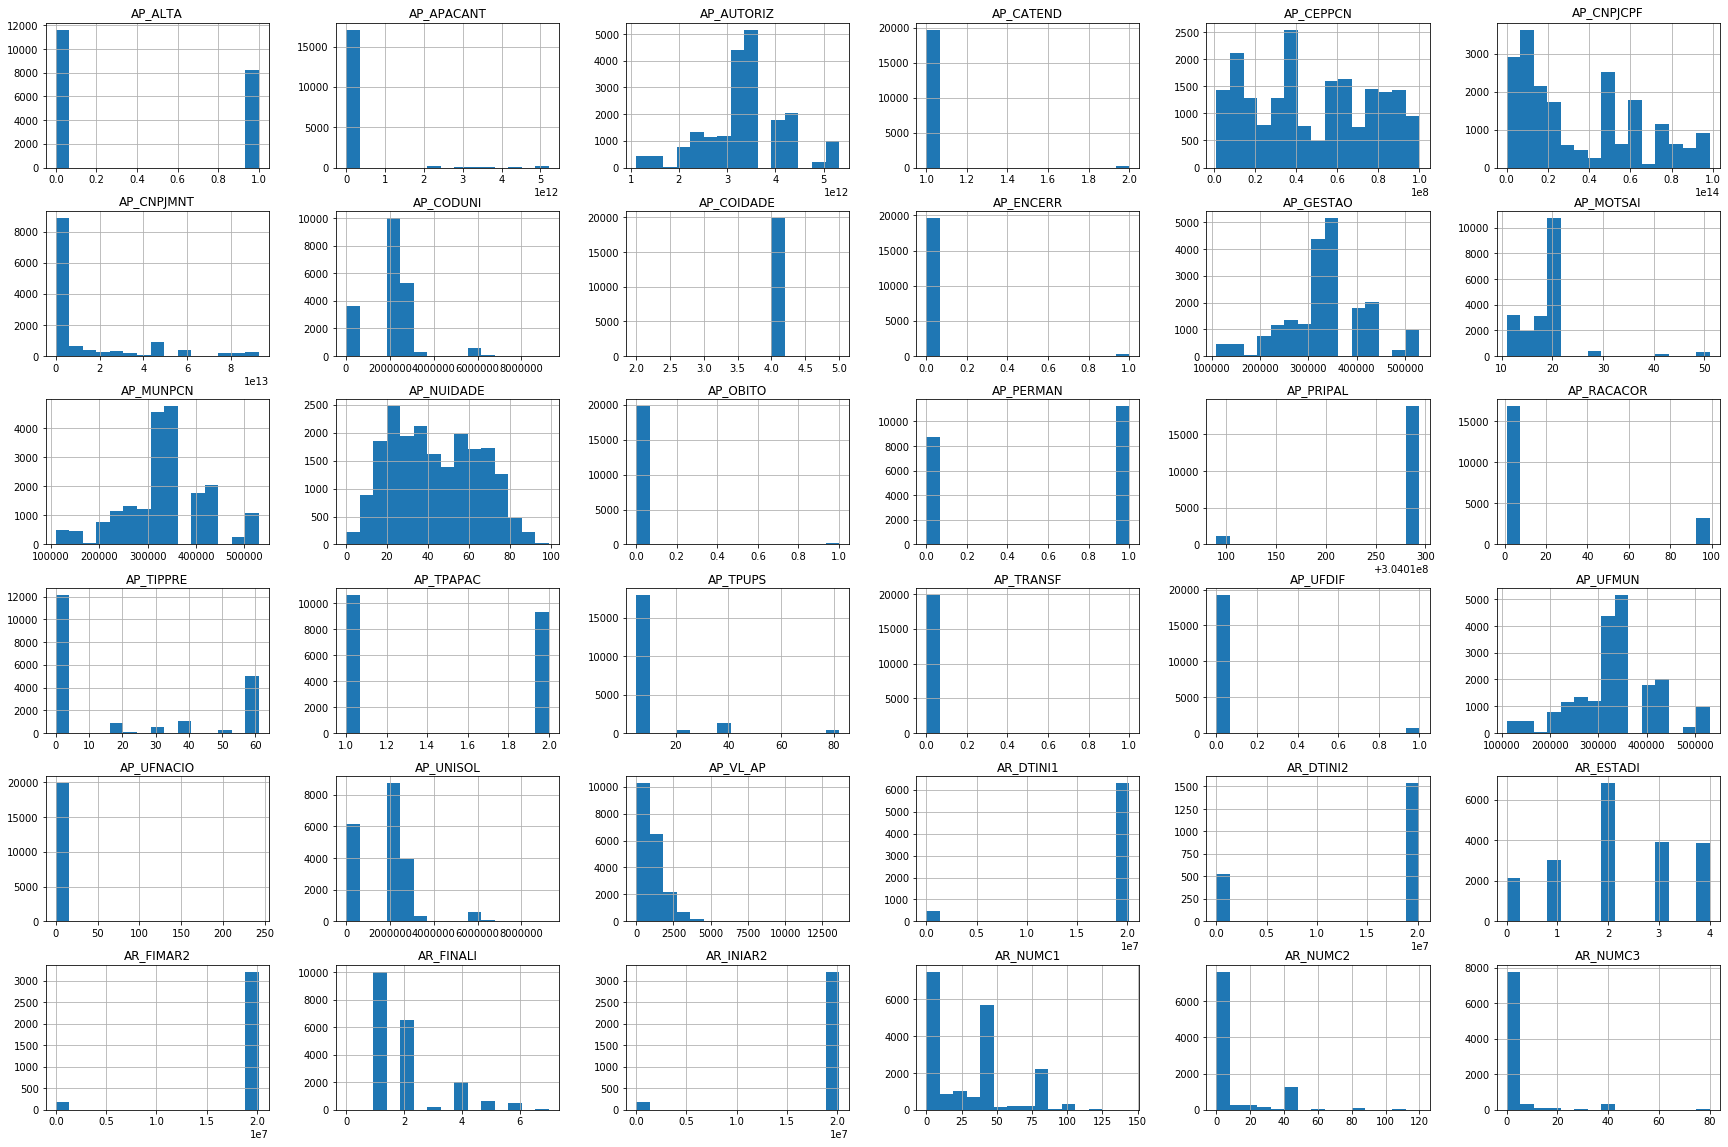

In [11]:
numerical = data._get_numeric_data().columns
data[numerical].hist(bins=15, figsize=(30, 20))

### read_csv_sia

Prepara o DF para o modelo. Nessa função tem o trabalho de feature engineering e também a adição de dados externos.


Ela faz:

- Filtra AP_TPAPAC = 1, já que estamos interessados apenas na primeira consulta.
- Filtramos os dados com data superior a 2014 por causa dos erros encontrados e também por causa das dados externos terem apenas dados a partir de 2014.

- Join com os dados externos dos municípios - dados economicos e latitude, logintutde.



In [20]:
data = read_sia_model('../data/Linfomas Radioterapia SIA-SUS.csv', method='radioterapia')

Reading csv...


/Users/helderrezende/anaconda3/envs/bcg_29/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (42,51) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Transforming csv to train...


### Dicionário das colunas - modelo sia

- CLINICAS_AMB_ESPECIALIZADO -  Número de clínicas por população


- HOSPITAL_ESPECIALIZADO -  Número de Hospital Especializado por população


- HOSPITAL_GERAL - Número de Hospital geral por população


- UN_BASICA_SAUDE - Número de Unidade basica de saude por população


- UN_DIAG_TERAPIA - Número de Unidade Diag por população


- LEITOS_INTERNACAO - Número de Leitos Internacao por população


- MAMOGRAFOS - Número de Mamografos por população


- RAIO_X - Número de Raio-x por população


- TOMAGRAFOS - Número de Tomagrafos por população


- RESSONANCIA_MAGNETICA - Número de Ressonância por população


- AP_MUNPCN_GINI - Índice de Gini


- AP_MUNPCN_RDPC - Renda per capita média


- AP_MUNPCN_T_AGUA - Percentual da população que vive em domicílios com água encanada


- AP_MUNPCN_AGUA_ESGOTO - Percentual de pessoas em domicílios com abastecimento de água e esgotamento sanitário inadequados


- AP_MUNPCN_T_BANAGUA - Percentual da população que vive em domicílios com banheiro e água encanada


- AP_MUNPCN_T_LIXO - Percentual da população que vive em domicílios urbanos com serviço de coleta de lixo


- AP_MUNPCN_I_ESCOLARIDADE - Subíndice de escolaridade da população adulta - IDHM Educação


- AP_MUNPCN_I_FREQ_PROP - Subíndice de frequência escolar da população jovem - IDHM Educação


- AP_MUNPCN_IDHM - Índice de Desenvolvimento Humano Municipal


- AP_MUNPCN_IDHM_E - Índice de Desenvolvimento Humano Municipal - Dimensão Educação


- AP_MUNPCN_IDHM_L - Índice de Desenvolvimento Humano Municipal  - Dimensão Longevidade


- AP_MUNPCN_T_SLUZ - % de pessoas em domicílios sem energia elétrica


- EWM_MEAN_DELAY - Tempo médio (usando média exponencial) de demora para iniciar o tratamento


- AP_MUNPCN_IDHM_R - Índice de Desenvolvimento Humano Municipal - Dimensão Renda


- MEDICOS - Número de Médicos por população


- ENFERMEIROS - Número de Unidade Enfermeiros por população.


- DISTANCE_HOSPITAL - Distância do CEP do paciente para o Hospital.